In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_style('whitegrid')

In [4]:
data_stores = pd.read_csv('data_stores.csv')

In [5]:
data_stores.head()

,STORE_ID,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA_CODE,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,389,SILVERLAKE,ERLANGER,KY,17140,MAINSTREAM,408.0,46073,24766.807692
1,2277,ANDERSON TOWNE CTR,CINCINNATI,OH,17140,UPSCALE,NaN,81958,54052.519231
2,4259,WARSAW AVENUE,CINCINNATI,OH,17140,VALUE,NaN,48813,31177.333333
3,6379,KINGWOOD,KINGWOOD,TX,26420,MAINSTREAM,NaN,50237,20620.423077
4,6431,AT WARD ROAD,BAYTOWN,TX,26420,VALUE,350.0,43698,24321.942308


Для начала проверим, коррелирует ли площадь магазина со средней суммой чека (?)

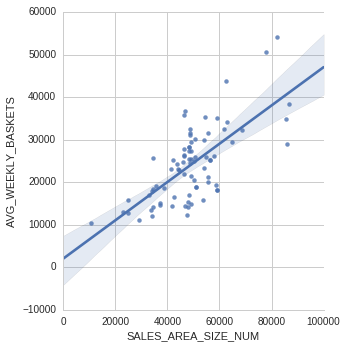

In [6]:
sns.lmplot(x = 'SALES_AREA_SIZE_NUM', y ='AVG_WEEKLY_BASKETS',data = data_stores)

Проверим, влияет ли как-то MSA-CODE ((Metropolitan Statistical Area) geographic region with a high core population density and close economic ties throughout the surrounding areas) на average weekly baskets sold in the store.
Кажется, что не влияет

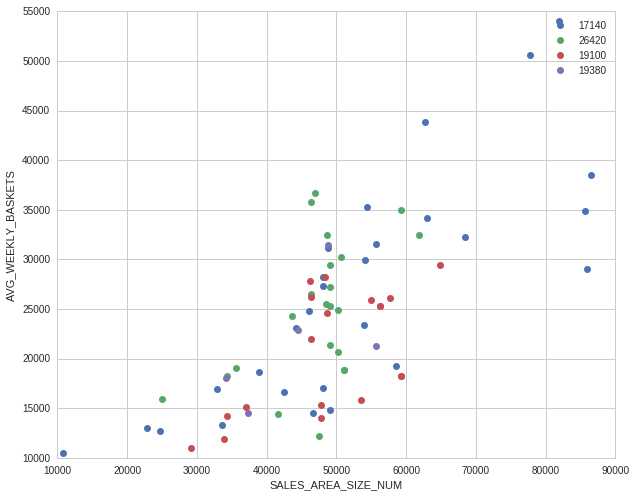

In [7]:
plt.figure(figsize = (10,8))

for msa_code in data_stores['MSA_CODE'].value_counts().keys()[:4]:
    xs = data_stores['SALES_AREA_SIZE_NUM'][data_stores['MSA_CODE'] == msa_code]
    ys = data_stores['AVG_WEEKLY_BASKETS'][data_stores['MSA_CODE'] == msa_code]
    plt.plot(xs, ys,'o',label = msa_code)
plt.xlabel('SALES_AREA_SIZE_NUM')
plt.ylabel('AVG_WEEKLY_BASKETS')
plt.legend()

In [8]:
data_stores.describe()

,STORE_ID,MSA_CODE,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
count,79.000000,79.000000,27.000000,79.000000,79.000000
mean,14502.468354,21236.202532,480.518519,49145.164557,24146.806232
std,8868.762031,6138.649376,403.659641,13512.452153,8720.396844
min,367.000000,13140.000000,17.000000,10788.000000,10434.705128
25%,6183.000000,17140.000000,282.000000,43067.500000,17522.432693
50%,15541.000000,19100.000000,351.000000,48594.000000,24567.750000
75%,23058.000000,26420.000000,488.500000,55200.500000,29186.262821
max,29159.000000,47540.000000,1859.000000,86517.000000,54052.519231


In [9]:
data_products = pd.read_csv('data_products.csv')

In [10]:
data_products.head()

,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
1,1111009497,PL PRETZEL STICKS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,1111009507,PL TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
3,1111035398,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),1.5 LT
4,1111038078,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML


In [11]:

def PRODUCTSIZE_to_ML(name):
    if name.split()[-1] == 'OZ':
        return 29.5735*float(name.split()[0])
    elif name.split()[-1] == 'LT':
        return 1000.*float(name.split()[0])
    elif name.split()[-1] == 'ML':
        return 1.*float(name.split()[0])
    elif name.split()[-1] == 'CT':
        return 1.*float(name.split()[0])

In [12]:
data_products['PRODUCT_SIZE'][27]

'16 CT'

In [13]:
data_products['FLOAT_PRODUCT_SIZE'] = data_products['PRODUCT_SIZE'].apply(PRODUCTSIZE_to_ML)

In [14]:
data_transaction = pd.read_csv('data_transactions.csv')

In [15]:
data_transaction.describe()

,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY
count,524950.000000,5.249500e+05,524950.000000,524950.000000,524950.000000,524950.000000,524927.000000,524765.000000,524950.000000,524950.000000,524950.000000
mean,14690.105660,1.031631e+10,19.608256,17.167349,16.777282,53.200729,3.382174,3.602747,0.084296,0.110134,0.134744
std,8891.432359,2.081698e+10,29.934184,24.740741,24.186299,68.180697,1.559303,1.631726,0.277831,0.313057,0.341451
min,367.000000,1.111009e+09,0.000000,1.000000,1.000000,0.000000,0.000000,0.550000,0.000000,0.000000,0.000000
25%,6187.000000,1.111087e+09,4.000000,4.000000,4.000000,13.360000,2.360000,2.500000,0.000000,0.000000,0.000000
50%,15541.000000,3.700032e+09,10.000000,9.000000,9.000000,31.920000,2.990000,3.170000,0.000000,0.000000,0.000000
75%,23067.000000,7.192100e+09,24.000000,21.000000,21.000000,67.600000,4.490000,4.590000,0.000000,0.000000,0.000000
max,29159.000000,8.849121e+10,1800.000000,1340.000000,1286.000000,2952.000000,11.460000,11.460000,1.000000,1.000000,1.000000


In [16]:
data = pd.merge(data_transaction,data_products, on = 'UPC')

In [18]:
data_glossary = pd.read_csv('data_glossary.csv')

Посмотрим, как влияют рекламные акции для товара на его уровень продаж. ("DISPLAY" и "UNITS")

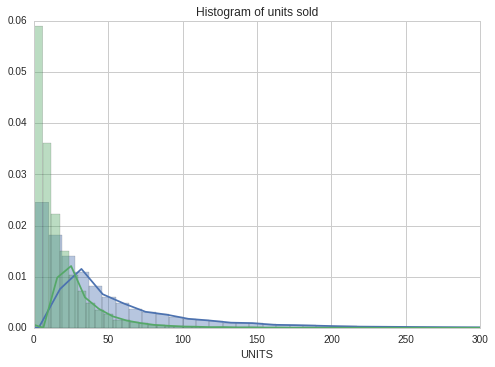

In [19]:
sns.distplot(data[data['DISPLAY'] == 1]['UNITS'],bins = 200,label = 'promotion' )
sns.distplot(data[data['DISPLAY'] == 0]['UNITS'], bins = 200,label = 'no promotion')
plt.xlim(0,300)
plt.title('Histogram of units sold')

In [20]:
print "MEAN UNITS SOLD WITH PROMOTION = ", data[data['DISPLAY'] == 1]['UNITS'].mean()
print "MEAN UNITS SOLD WITHOUT PROMOTION =", data[data['DISPLAY'] == 0]['UNITS'].mean()
print "MEDIAN UNITS SOLD WITH PROMOTION = ", data[data['DISPLAY'] == 1]['UNITS'].median()
print "MEDIAN UNITS SOLD WITHOUT PROMOTION =", data[data['DISPLAY'] == 0]['UNITS'].median()

MEAN UNITS SOLD WITH PROMOTION =  45.5855400848
MEAN UNITS SOLD WITHOUT PROMOTION = 16.3931754204
MEDIAN UNITS SOLD WITH PROMOTION =  27.0
MEDIAN UNITS SOLD WITHOUT PROMOTION = 9.0


(0, 100)

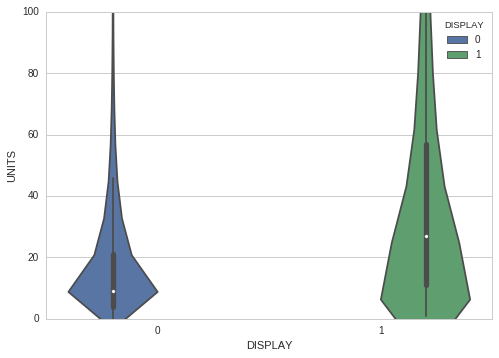

In [21]:
sns.violinplot(x = 'DISPLAY', y = 'UNITS',data = data, hue = 'DISPLAY')
plt.ylim(0,100)

Посмотрим, как влияют рекламные акции на количество покупаемой продукции по подкатегориям. Для начала рассмотрим оценки для средних, а затем медианы

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

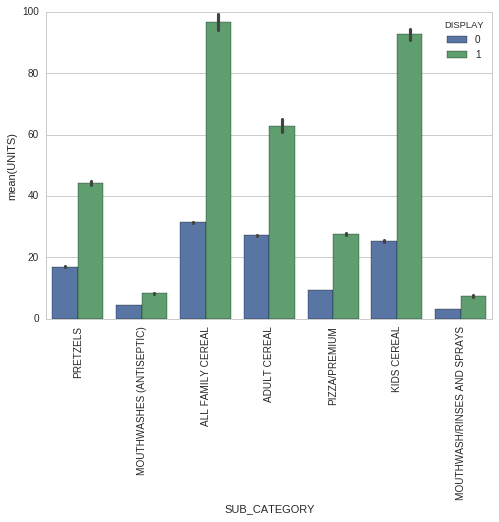

In [23]:
sns.barplot(x = 'SUB_CATEGORY', y = 'UNITS',data = data, hue = 'DISPLAY')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

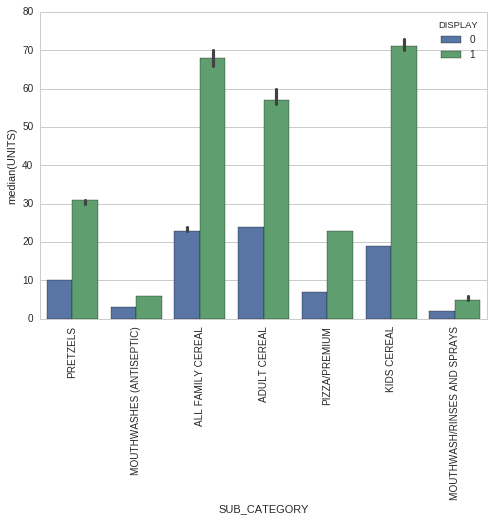

In [24]:
sns.barplot(x = 'SUB_CATEGORY', y = 'UNITS',data = data, hue = 'DISPLAY',estimator=np.median)
plt.xticks(rotation = 90)

Наконец, посмотрим, в какое количество раз изменилось значение среднего (т.е. для какой категории товаров реклама проходит наиболее "эффективно")

In [71]:
cats = []
meadian_in_cats = []
for cat in data['SUB_CATEGORY'].unique():
    m_d = data['UNITS'][data['SUB_CATEGORY'] == cat][data['DISPLAY'] == 1].median()
    m_nd = data['UNITS'][data['SUB_CATEGORY'] == cat][data['DISPLAY'] == 0].median()
    cats.append(cat)
    meadian_in_cats.append((m_d-m_nd)/m_nd)

(-0.5, 7.5)

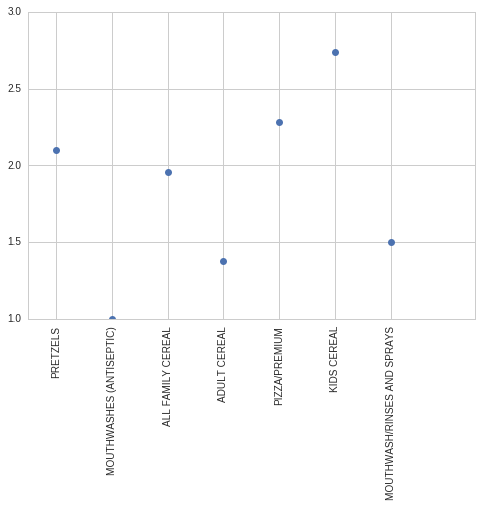

In [72]:
plt.plot(meadian_in_cats,'o')
plt.xticks(range(len(cats)), cats,rotation = 90)
plt.xlim(-0.5,len(cats)+0.5)

In [73]:
for x in sorted(zip(meadian_in_cats,cats)):
    print x

(1.0, 'MOUTHWASHES (ANTISEPTIC)')
(1.375, 'ADULT CEREAL')
(1.5, 'MOUTHWASH/RINSES AND SPRAYS')
(1.9565217391304348, 'ALL FAMILY CEREAL')
(2.1, 'PRETZELS')
(2.2857142857142856, 'PIZZA/PREMIUM')
(2.736842105263158, 'KIDS CEREAL')


Кажется, здесь побеждают пиццы премиального класса и хлопушки для детей, а омывайка для рта идёт не очень :)

** ПРОВЕРИТЬ ГИПОТЕЗЫ О РАЗНЫХ СРЕДНИХ ДЛЯ КОЛИЧЕСТВА ПОКУПОК** То же можно оценить и для TPR_ONLY

Посмотрим теперь, как снижение цен, неотображаемое в рекламе, влияет на спрос покупателя. (TPR ONLY отражает факт снижения стоимости без отображения рекламы)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

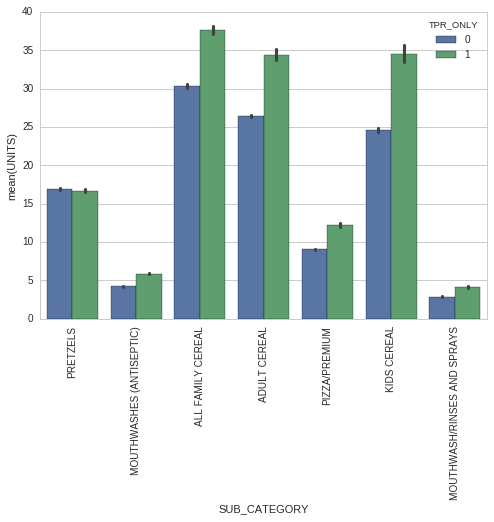

In [70]:
sns.barplot(x =  'SUB_CATEGORY', y = 'UNITS',data = data[data['DISPLAY'] == 0], hue = 'TPR_ONLY')
plt.xticks(rotation = 90)

Не так сильно, как реклама, но всё же.

По угару можно посмотреть, какие по цене товары каждой категории (SUB_CATEGORY) пользуются наибольшим спросом.

In [ ]:
for cat in cats:
    sns.jointplot(x = 'UNITS',y = 'PRICE', data = data[data['SUB_CATEGORY'] == cat])
    plt.title(cat)

Что ещё анализировать?

In [86]:
data_glossary

,VARIABLE NAME,TABLE,DESCRIPTION
0,ADDRESS_CITY_NAME,store lookup,city
1,ADDRESS_STATE_PROV_CODE,store lookup,state
2,AVG_WEEKLY_BASKETS,store lookup,average weekly baskets sold in the store
3,BASE_PRICE,data,base price of item
4,MANUFACTURER,products lookup,manufacturer
5,CATEGORY,products lookup,category of product
6,DESCRIPTION,products lookup,prodcut description
7,DISPLAY,data,product was a part of in-store promotional dis...
8,FEATURE,data,product was in in-store circular
9,HHS,data,# of purchasing households


Для регрессионных моделей можно построить зависимость "спроса" от цены для каждой подкатегории, например.

/home/boris/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


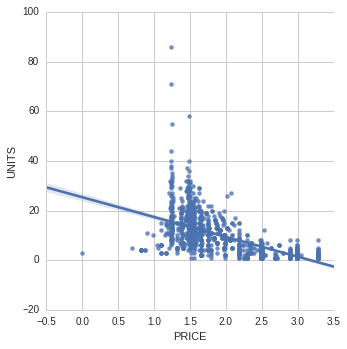

In [97]:
sns.lmplot(y = 'UNITS', x = 'PRICE', data = data[data['SUB_CATEGORY'] == 'PRETZELS'][data['STORE_NUM'] == 367])